# Premoddeling Analysis and Preparation

## Import required packages and data

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from matplotlib.pylab import rcParams
%matplotlib inline

In [12]:
zill = pd.read_csv('../data/processed/zillow_cleaned_no_nulls.csv', index_col=0, dtype = {'zip':'object'})

In [18]:
zill.index = pd.to_datetime(zill.index)
zill.dtypes

regionid        int64
zip            object
city           object
state          object
metro          object
countyname     object
sizerank        int64
value         float64
dtype: object

## Define list of best zip codes
Create new data frame of just these values

In [14]:
best_zips = ['10011', '10014', '10021', '90210', '94027', '94022', '33480', '10128', '11215', '11217']
top_zips = zill.loc[(zill.zip.isin(best_zips))]

In [15]:
kill_cols = ['regionid', 'city', 'state', 'metro', 'countyname', 'sizerank']
top_zips = top_zips.drop(columns = kill_cols)

## Define dataframes of just each zip code's name

In [45]:
chelsea = top_zips.loc[(top_zips.zip == '10011')]
greenwich = top_zips.loc[(top_zips.zip == '10014')]
bevhills = top_zips.loc[(top_zips.zip == '90210')]

## Review mean house values over time

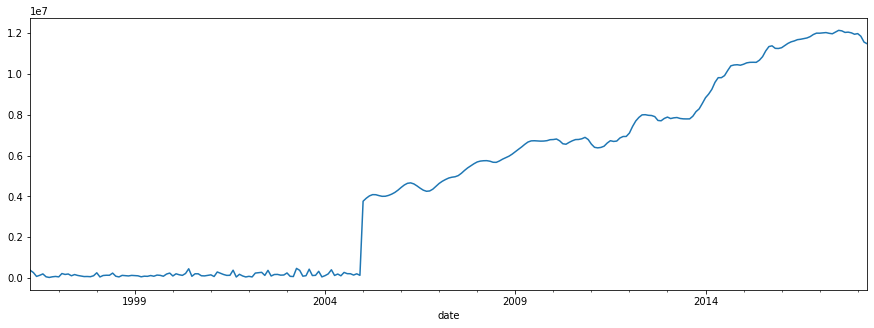

In [55]:
chelsea.value.rolling(1).mean().plot(figsize=(15,5));

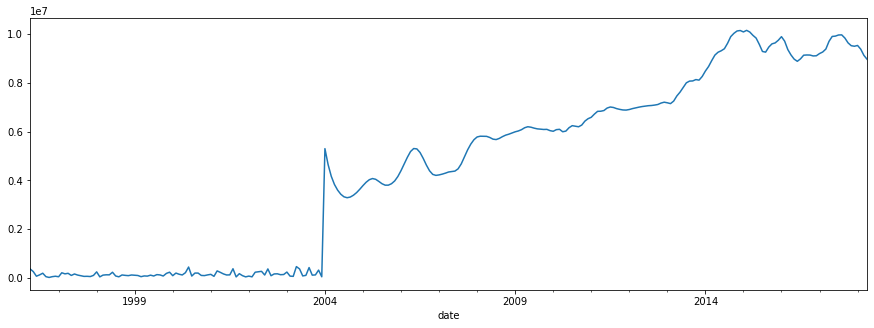

In [56]:
greenwich.value.rolling(1).mean().plot(figsize=(15,5));

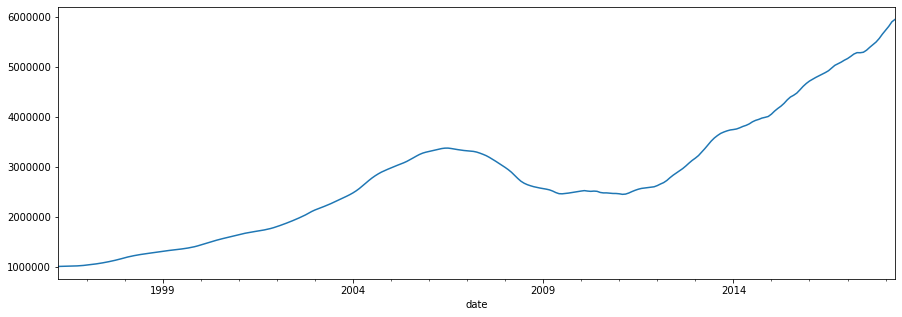

In [54]:
bevhills.value.rolling(1).mean().plot(figsize=(15,5));

## Create and review autocorrilation plots

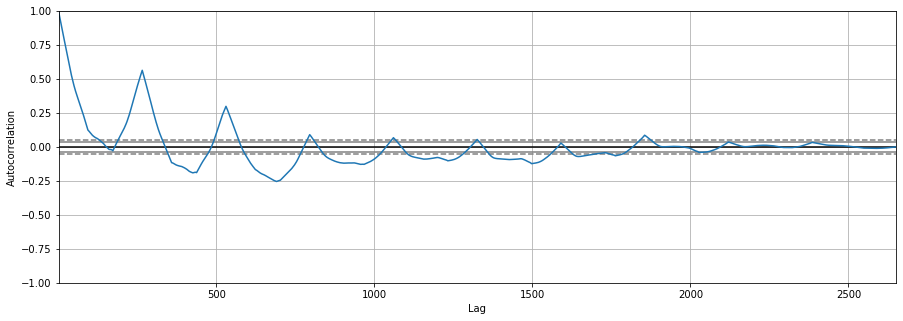

In [32]:
plt.figure(figsize=(15,5))
figure = pd.plotting.autocorrelation_plot(top_zips.value);

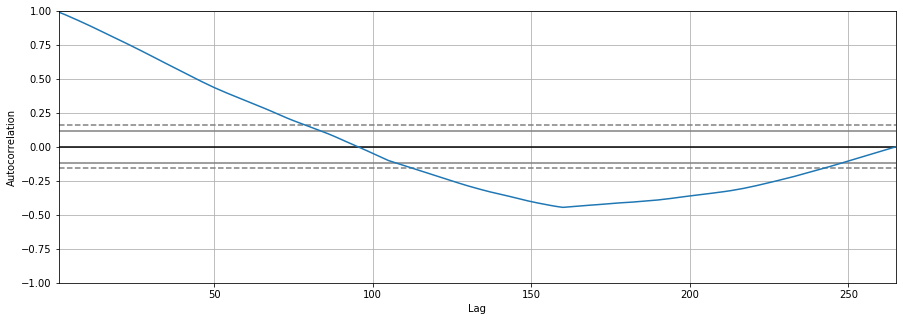

In [33]:
plt.figure(figsize=(15,5))
figure = pd.plotting.autocorrelation_plot(chelsea.value);

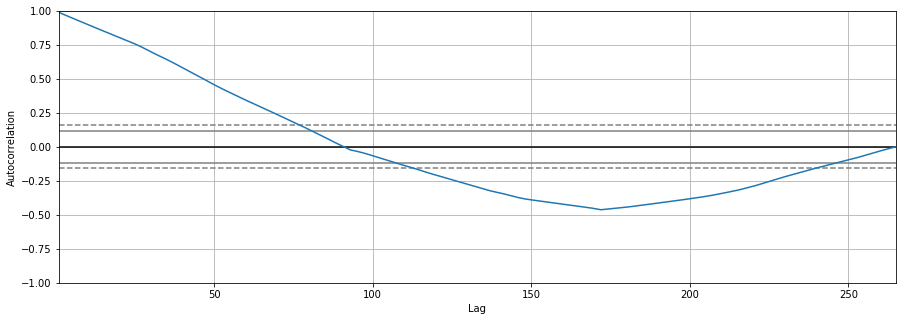

In [35]:
plt.figure(figsize=(15,5))
figure = pd.plotting.autocorrelation_plot(greenwich.value);

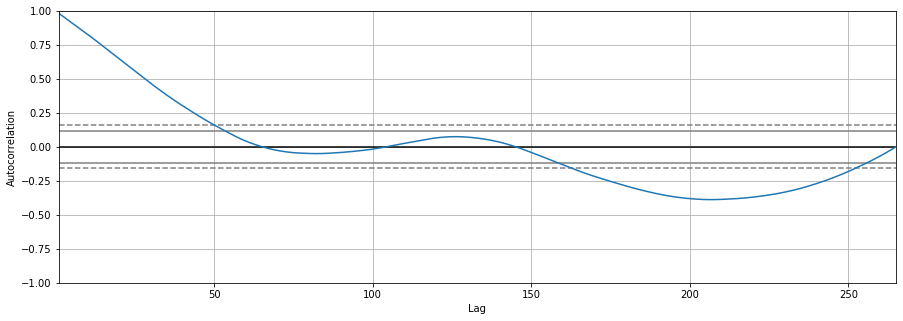

In [37]:
plt.figure(figsize=(15,5))
figure = pd.plotting.autocorrelation_plot(bevhills.value);

## Alternative to pandas' autocorrelaiton

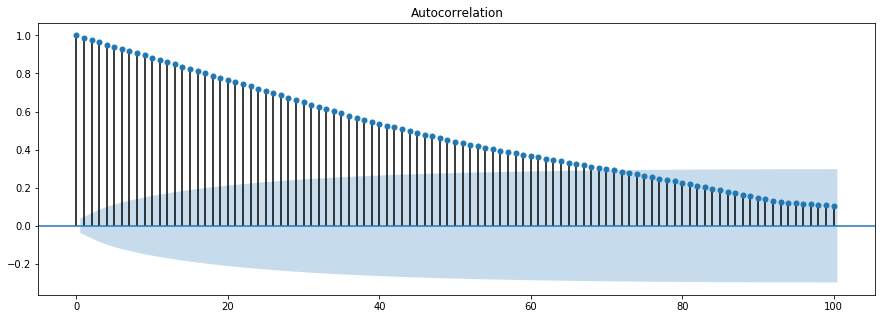

In [87]:
rcParams['figure.figsize'] = 15, 5
plot_acf(top_zips.value, lags=100);

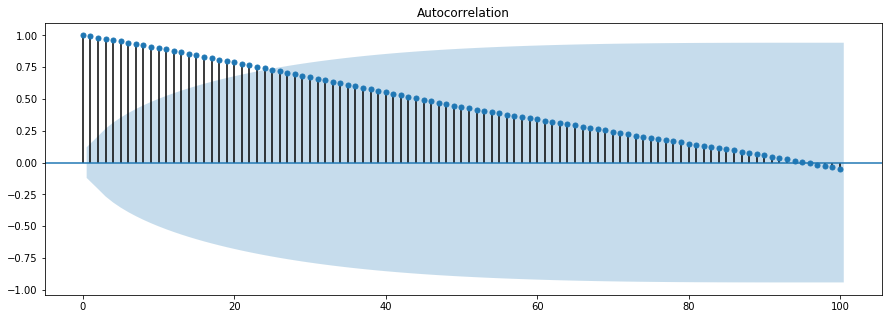

In [89]:
rcParams['figure.figsize'] = 15, 5
plot_acf(chelsea.value, lags=100);

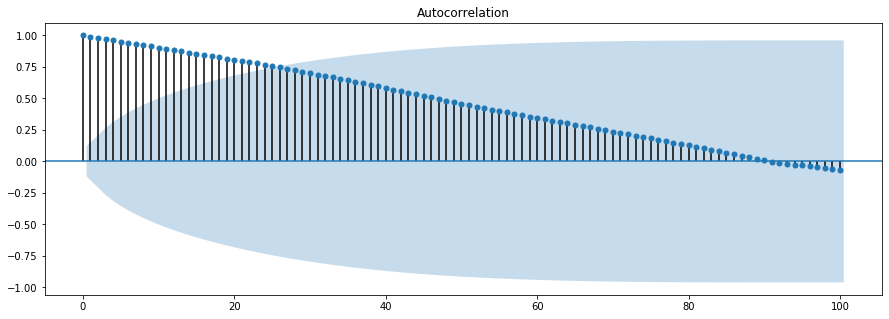

In [90]:
rcParams['figure.figsize'] = 15, 5
plot_acf(greenwich.value, lags=100);

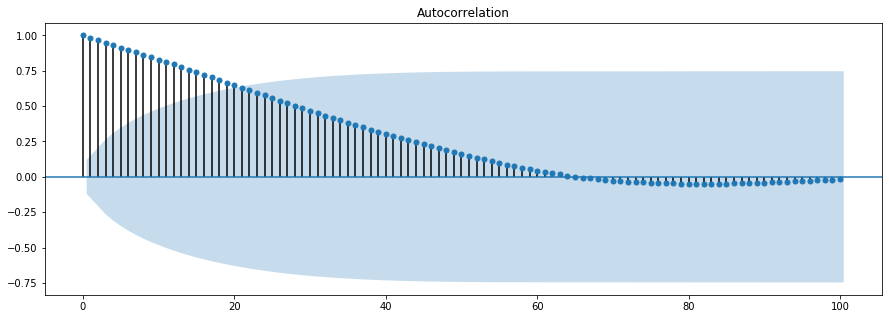

In [88]:
rcParams['figure.figsize'] = 15, 5
plot_acf(bevhills.value, lags=100);

## Plot partial autocorrelation function
Plots currently inlcude dumm lags, better values pending further analysis

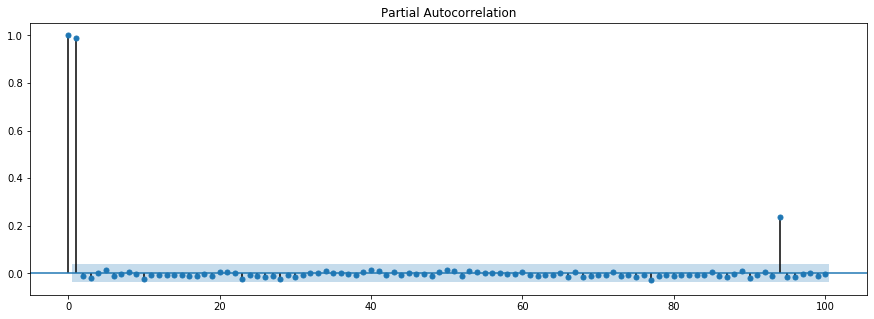

In [82]:
rcParams['figure.figsize'] = 15, 5
plot_pacf(top_zips.value, lags=100);

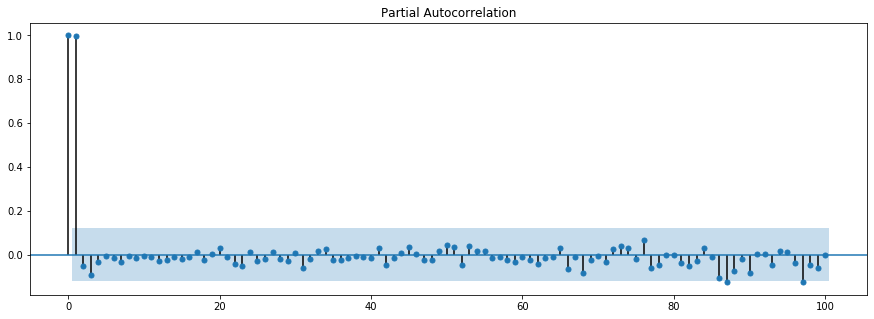

In [83]:
rcParams['figure.figsize'] = 15, 5
plot_pacf(chelsea.value, lags=100);

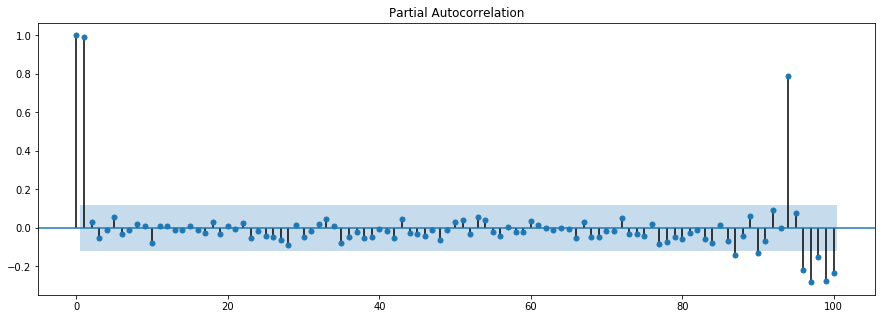

In [84]:
rcParams['figure.figsize'] = 15, 5
plot_pacf(greenwich.value, lags=100);

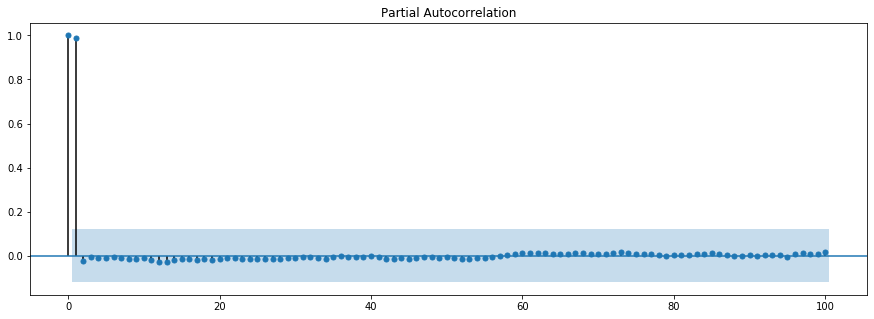

In [85]:
rcParams['figure.figsize'] = 15, 5
plot_pacf(bevhills.value, lags=100);